In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [14]:
#Download the dataset using pandas datareader from yahoo financ
import pandas_datareader as web
import datetime
 
# We will look at stock prices over the past year, starting at June 30, 2010
start = datetime.datetime(2000,6,30)
end = datetime.datetime(2020,2,3)

# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date,
# fourth is the end date
#volkswagen_stockdata = web.DataReader("VWAGY", "yahoo", start, end)
generalmotors_stockdata = web.DataReader("GM", "yahoo", start, end)

In [15]:
generalmotors_stockdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.474590
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.528797
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.389408
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.746712
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.924818


In [16]:
generalmotors_stockdata.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2316.000000,2316.000000,2316.000000,2316.000000,2.316000e+03,2316.000000
mean,33.557042,32.834059,33.217923,33.196921,1.366824e+07,28.248201
std,5.535054,5.516697,5.532497,5.521155,1.206883e+07,6.376283
min,19.129999,18.719999,19.020000,18.799999,2.757600e+06,14.557546
25%,30.790001,30.057499,30.397500,30.427500,8.821275e+06,24.502150
50%,34.689999,33.970001,34.390001,34.355000,1.159805e+07,27.910990
75%,37.180000,36.470001,36.842500,36.832501,1.553635e+07,32.765750
max,46.759998,45.720001,45.910000,46.480000,4.570443e+08,42.464954


Text(0, 0.5, 'Close  Price (USD)')

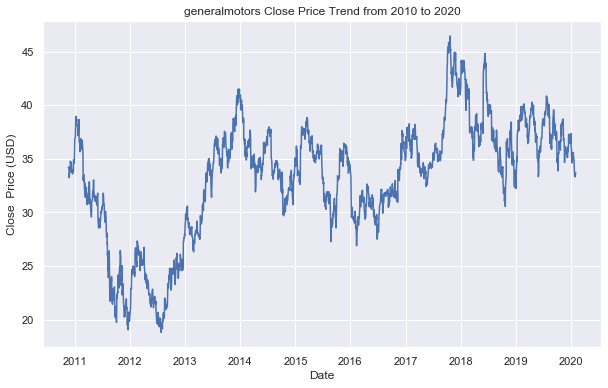

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(generalmotors_stockdata.index,generalmotors_stockdata['Close'])
plt.title('generalmotors Close Price Trend from 2010 to 2020')
plt.ylabel('Close  Price (USD)')

Text(0, 0.5, 'Close  Price (USD)')

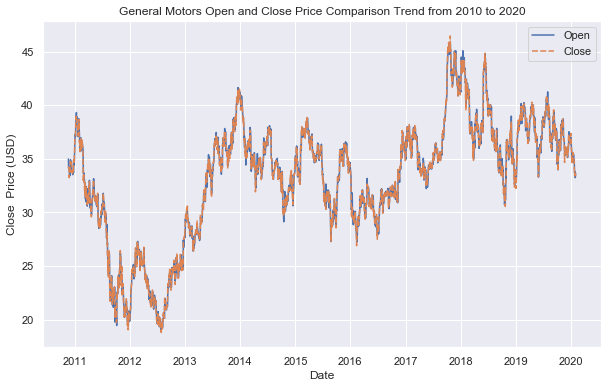

In [19]:
# Volkswagen Stock Open and Close Price Trend (2010-2020)
stocks = pd.DataFrame({'Open':generalmotors_stockdata['Open'],'Close':generalmotors_stockdata['Close']})
plt.figure(figsize=(10,6))
sns.lineplot(data=stocks)
plt.title('General Motors Open and Close Price Comparison Trend from 2010 to 2020')
plt.ylabel('Close  Price (USD)')

Text(0.5, 1.0, 'General Motors Stock Volume Trend from 2010 to 2020')

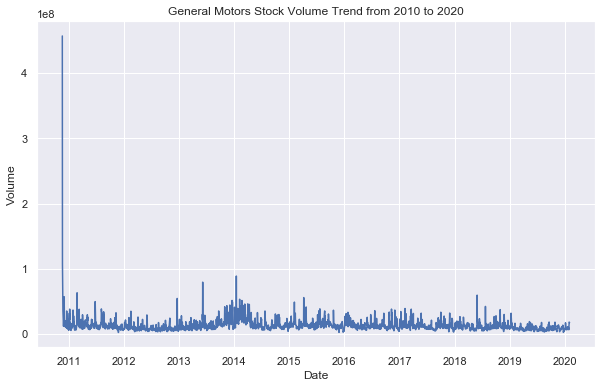

In [21]:
#Tesla Stock volume
plt.figure(figsize=(10,6))
sns.lineplot(generalmotors_stockdata.index,generalmotors_stockdata['Volume'])
plt.title('General Motors Stock Volume Trend from 2010 to 2020')

### Feature Scaling

In [23]:
# Scaling and Splitting the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

cols_to_train = ["Open","High","Low","Close","Volume"]
#Splitting into train and test
train_dataset, test_dataset = train_test_split(generalmotors_stockdata, train_size=0.9, test_size=0.1, shuffle=False)

#Splitting from Train into Train and Validation datasets
train_dataset, validation_dataset = train_test_split(train_dataset, train_size=0.8, test_size=0.2, shuffle=False)

print("Train {}, Validation {} and Test size {}".format(len(train_dataset),len(validation_dataset), len(test_dataset)))

# append last 60 days of data 
last60days = train_dataset.tail(60)
validation_dataset = last60days.append(validation_dataset)

last60days = validation_dataset.tail(60)
test_dataset = last60days.append(test_dataset)

# scale the feature 
x = train_dataset.loc[:,cols_to_train].values
scaler = MinMaxScaler()
scaled_traindata = scaler.fit_transform(x)
scaled_validationdata = scaler.fit_transform(validation_dataset.loc[:,cols_to_train])
scaled_testdata = scaler.transform(test_dataset.loc[:,cols_to_train])

Train 1667, Validation 417 and Test size 232


In [24]:
train_dataset.shape,validation_dataset.shape,test_dataset.shape

((1667, 6), (477, 6), (292, 6))

In [25]:
scaled_traindata, scaled_validationdata, scaled_testdata

(array([[0.70583039, 0.7420776 , 0.67662801, 0.67707874, 1.        ],
        [0.66828628, 0.67649654, 0.6418377 , 0.68015835, 0.23131736],
        [0.67049473, 0.67561623, 0.67305986, 0.67223946, 0.07460707],
        ...,
        [0.70450535, 0.70070425, 0.71587873, 0.70963491, 0.01083479],
        [0.68462899, 0.74251767, 0.70160577, 0.7377915 , 0.01795804],
        [0.73100705, 0.72403183, 0.72078509, 0.7131544 , 0.01774584]]),
 array([[0.20539834, 0.17331588, 0.21372028, 0.21419609, 0.18466075],
        [0.22185653, 0.17135389, 0.1998681 , 0.21105519, 0.1247229 ],
        [0.21790647, 0.18443439, 0.20844336, 0.2123115 , 0.2005724 ],
        ...,
        [0.59907835, 0.55199484, 0.56992086, 0.56030151, 0.10048861],
        [0.60105325, 0.55591906, 0.56002631, 0.56344217, 0.07667328],
        [0.59117848, 0.65598439, 0.55870701, 0.5458543 , 0.07346125]]),
 array([[0.49374599, 0.44669721, 0.39182057, 0.37437192, 0.19208183],
        [0.33048072, 0.27992158, 0.28693931, 0.3228644 , 0.1

In [26]:
# Creating the time series data
TIMESTEPS = 60
target_col_index =3
def create_timeseries(scaled_data):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    #dim0 = mat.shape[0] - TIMESTEPS
    #dim1 = mat.shape[1]
    #x = np.zeros((dim0, TIMESTEPS, dim1))
    #y = np.zeros((dim0,))
    input_data = []
    target_data = []
    for i in range(TIMESTEPS,scaled_data.shape[0]):
        input_data.append(scaled_data[i-TIMESTEPS:i])
        target_data.append(scaled_data[i,3])
    #for i in range(dim0):
        #x[i] = mat[i:TIMESTEPS+i]
        #y[i] = mat[TIMESTEPS+i, target_col_index]
    input_data , target_data = np.array(input_data), np.array(target_data)
    print("length of time-series input/target",input_data.shape,target_data.shape)
    return input_data,target_data

In [27]:
x_train, y_train = create_timeseries(scaled_traindata)
x_val, y_val = create_timeseries(scaled_validationdata)
x_test, y_test = create_timeseries(scaled_testdata)

length of time-series input/target (1607, 60, 5) (1607,)
length of time-series input/target (417, 60, 5) (417,)
length of time-series input/target (232, 60, 5) (232,)


In [28]:
x_train.shape[1],5

(60, 5)

In [67]:
#Building the model
def get_model():
    
    new_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(32, activation='relu', return_sequences = True, input_shape=(x_train.shape[1],5),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64, activation='relu', return_sequences = True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(50, activation='relu', return_sequences = True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(50, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
    ])
    #opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    new_model.compile(loss='mse', optimizer='adam')
    
    return new_model
#lr = 0.00010000
#optimizer = tf.keras.optimizers.RMSprop(lr=lr)


In [68]:
new_model = get_model()
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 60, 32)            4864      
_________________________________________________________________
dropout_36 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 60, 64)            24832     
_________________________________________________________________
dropout_37 (Dropout)         (None, 60, 64)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 60, 50)            23000     
_________________________________________________________________
dropout_38 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 50)               

In [71]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=40)
modelhistory = new_model.fit(x_train, y_train, epochs=100, batch_size=16, shuffle=False,validation_data=(x_val,y_val),callbacks=[es])

Train on 1607 samples, validate on 417 samples
Epoch 1/100
1607/1607 [==============================] - 21s 13ms/sample - loss: 0.0288 - val_loss: 0.0203
Epoch 2/100
1607/1607 [==============================] - 36s 22ms/sample - loss: 0.0201 - val_loss: 0.0142
Epoch 3/100
1607/1607 [==============================] - 25s 16ms/sample - loss: 0.0120 - val_loss: 0.0143
Epoch 4/100
1607/1607 [==============================] - 25s 16ms/sample - loss: 0.0121 - val_loss: 0.0145
Epoch 5/100
1607/1607 [==============================] - 25s 16ms/sample - loss: 0.0108 - val_loss: 0.0141
Epoch 6/100
1607/1607 [==============================] - 25s 15ms/sample - loss: 0.0109 - val_loss: 0.0150
Epoch 7/100
1607/1607 [==============================] - 26s 16ms/sample - loss: 0.0103 - val_loss: 0.0143
Epoch 8/100
1607/1607 [==============================] - 25s 16ms/sample - loss: 0.0103 - val_loss: 0.0143
Epoch 9/100
1607/1607 [==============================] - 26s 16ms/sample - loss: 0.0100 - val_los

1607/1607 [==============================] - 45s 28ms/sample - loss: 0.0086 - val_loss: 0.0109
Epoch 77/100
1607/1607 [==============================] - 45s 28ms/sample - loss: 0.0079 - val_loss: 0.0113
Epoch 78/100
1607/1607 [==============================] - 47s 29ms/sample - loss: 0.0078 - val_loss: 0.0108
Epoch 79/100
1607/1607 [==============================] - 46s 28ms/sample - loss: 0.0079 - val_loss: 0.0109
Epoch 80/100
1607/1607 [==============================] - 44s 27ms/sample - loss: 0.0079 - val_loss: 0.0109
Epoch 81/100
1607/1607 [==============================] - 47s 29ms/sample - loss: 0.0083 - val_loss: 0.0110
Epoch 82/100
1607/1607 [==============================] - 44s 28ms/sample - loss: 0.0082 - val_loss: 0.0108
Epoch 83/100
1607/1607 [==============================] - 44s 27ms/sample - loss: 0.0078 - val_loss: 0.0113
Epoch 84/100
1607/1607 [==============================] - 46s 29ms/sample - loss: 0.0077 - val_loss: 0.0107
Epoch 85/100
1607/1607 [=================

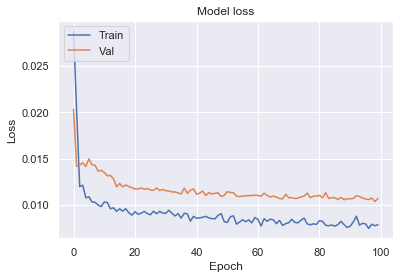

In [72]:
plt.figure()
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [73]:
predictions = new_model.predict(x_test)

In [74]:
scaler.scale_

array([6.58327824e-02, 6.54022279e-02, 6.59630531e-02, 6.28140701e-02,
       1.76776516e-08])

In [75]:
scale = 1/6.28140701e-02

predictions = predictions*scale
actualoutcome = y_test*scale

In [76]:
comparison = pd.DataFrame(actualoutcome, columns=['Actual Values'])
comparison['Predicted Values'] = predictions
comparison.head(10)

,Actual Values,Predicted Values
0,8.719999,8.846610
1,8.109999,8.790009
2,7.480001,8.704177
3,7.430002,8.570828
4,8.059999,8.393840
5,8.059999,8.191948
6,8.240000,8.019906
7,7.469999,7.918444
8,7.510000,7.867056
9,7.420000,7.823690


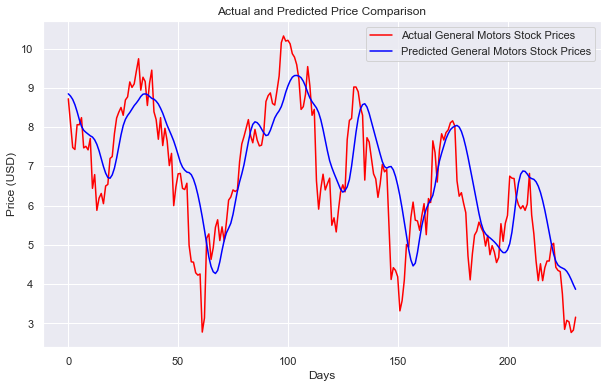

In [77]:
# Close Price Comparison (Actual and Predicted)
plt.figure(figsize=(10,6))
plt.plot(actualoutcome, color='red', label='Actual General Motors Stock Prices')
plt.plot(predictions, color='blue', label='Predicted General Motors Stock Prices')
plt.title('Actual and Predicted Price Comparison')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()